# The GGPlot2 package
Import the package

In [2]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.2.0     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
#Simulating data
housing <- read_csv("sample_data/california_housing_train.csv")

Rows: 17000 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): longitude, latitude, housing_median_age, total_rooms, total_bedroom...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [8]:
housing %>% 
  select(total_rooms, total_bedrooms, population, households, median_income, median_house_value) %>% 
  mutate(sex = sample(c('male', 'female'), 17000, replace=T, prob=c(0.63, 1-0.63))) %>% 
  mutate(highest_education = sample(c('elementary', 'high school', 'associate degree', 'college', 'graduate'), 17000, replace=T, prob=c(0.21, 0.32, 0.04, 0.11, 1-(0.21 + 0.32 + 0.04 + 0.11)))) -> housing

In [9]:
install.packages("HSAUR2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [10]:
library(HSAUR2)

Loading required package: tools


Attaching package: ‘HSAUR2’


The following object is masked from ‘package:tidyr’:

    household




In [11]:
data()

In [22]:
data(USArrests)

In [24]:
ls()

[1] "housing"        "schizophrenia"  "Titanic"        "USArrests"     
[5] "USstates"       "who"            "world_bank_pop"

ggplot()   

what type of visualization do you want?   

geom_type(aes(x..., y...), params...) 


### Univariate Analysis

In [25]:
# Numeric (Quantitative)
a <- rnorm(17000, 50, 5)

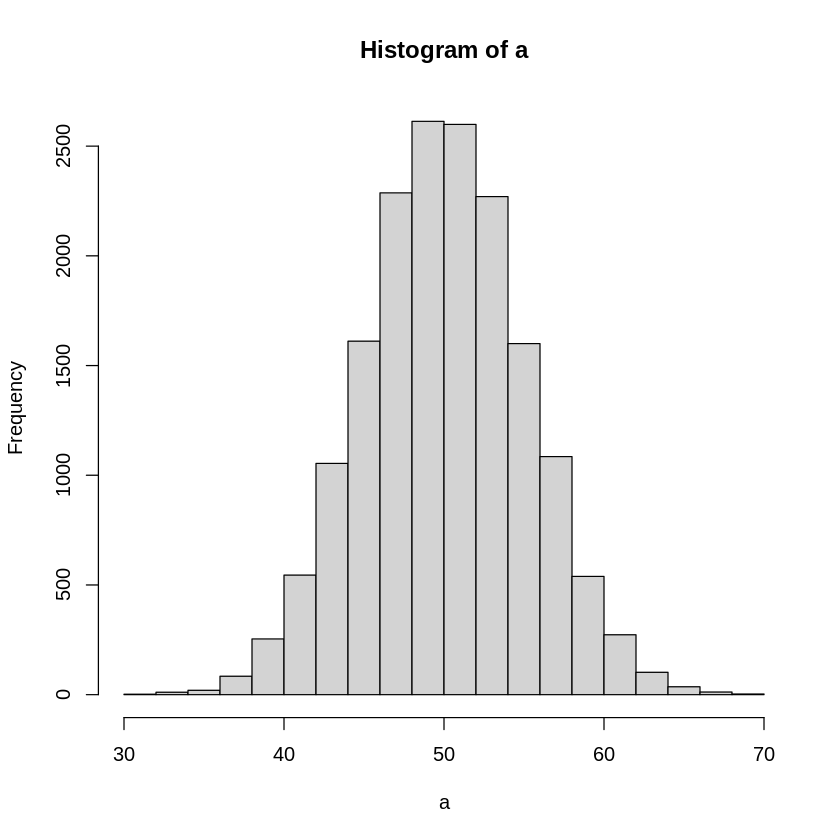

In [45]:
hist(a)

In [29]:
housing %>% names()

[1] "total_rooms"        "total_bedrooms"     "population"        
[4] "households"         "median_income"      "median_house_value"
[7] "sex"                "highest_education"

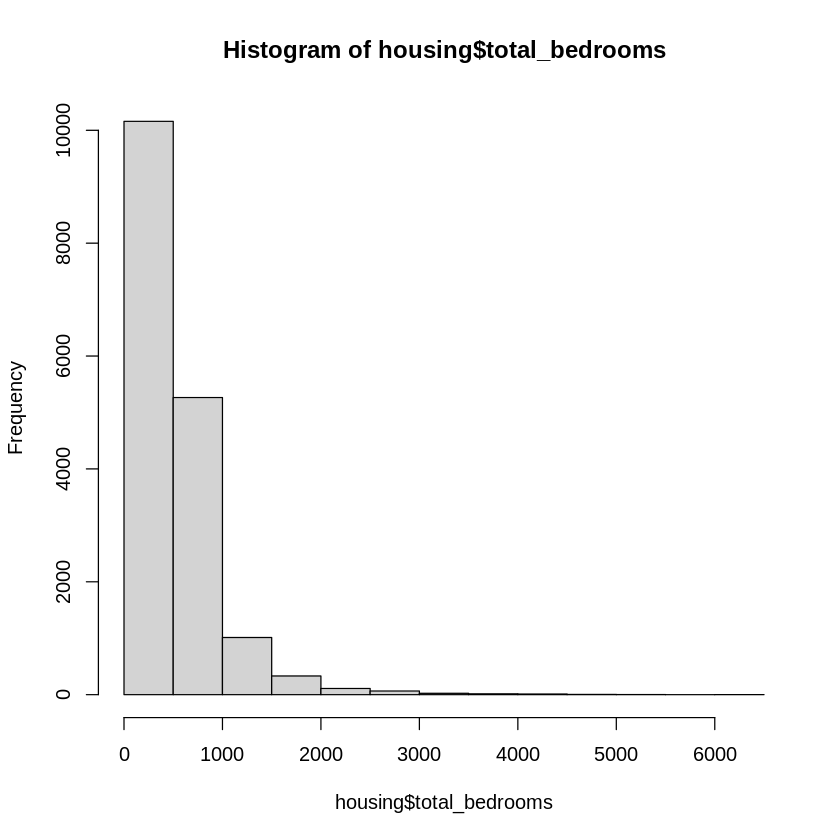

In [31]:
hist(housing$total_bedrooms)

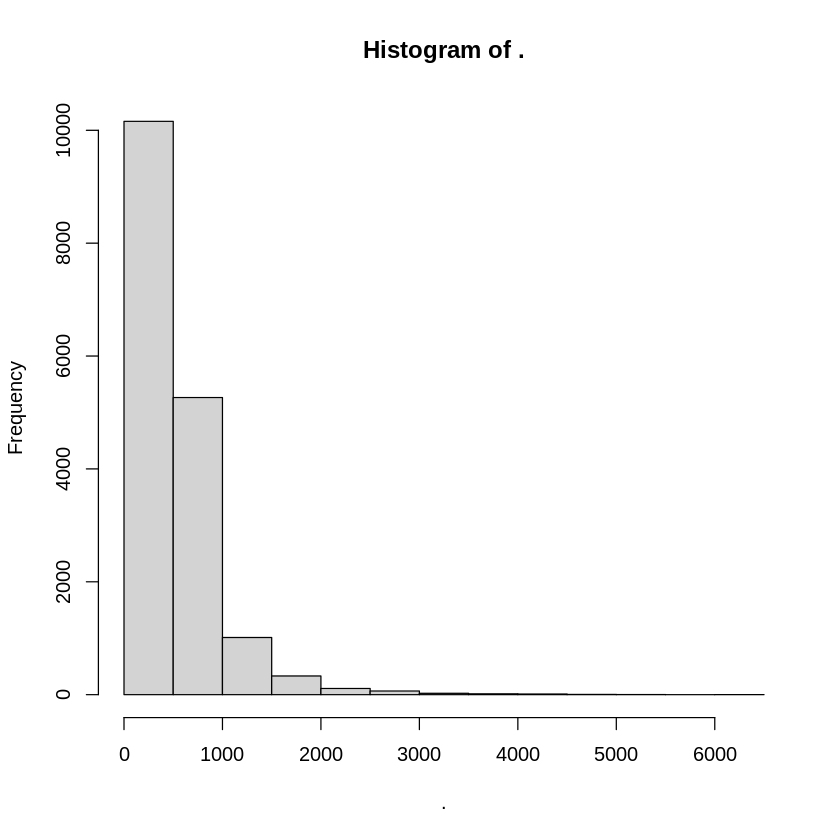

In [34]:
housing %>% with(total_bedrooms) %>% hist()

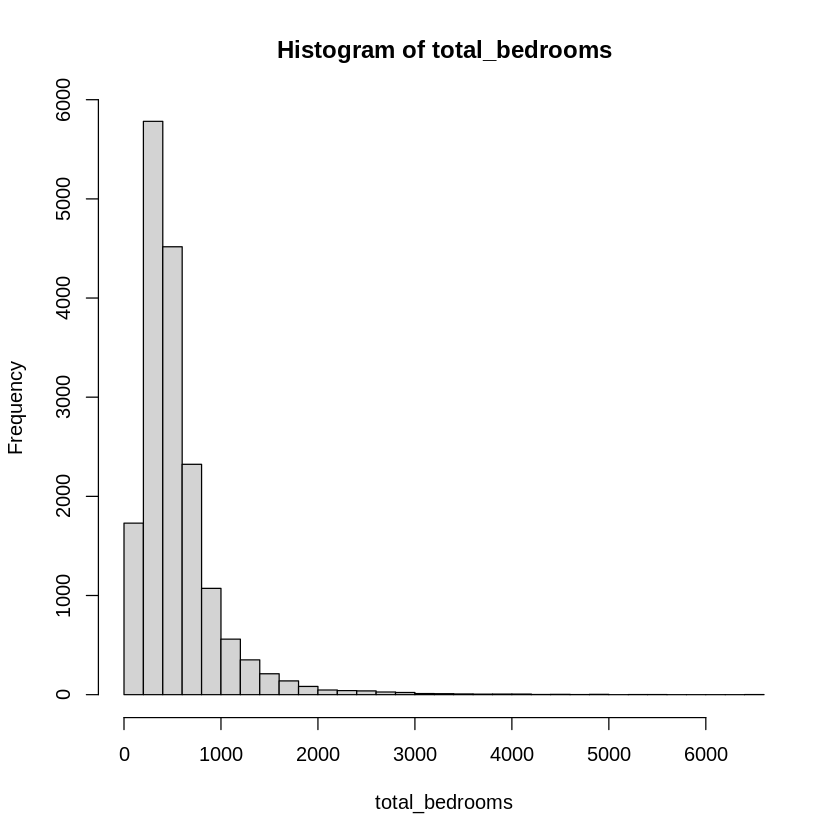

In [47]:
housing %>% with(hist(total_bedrooms, breaks=30))

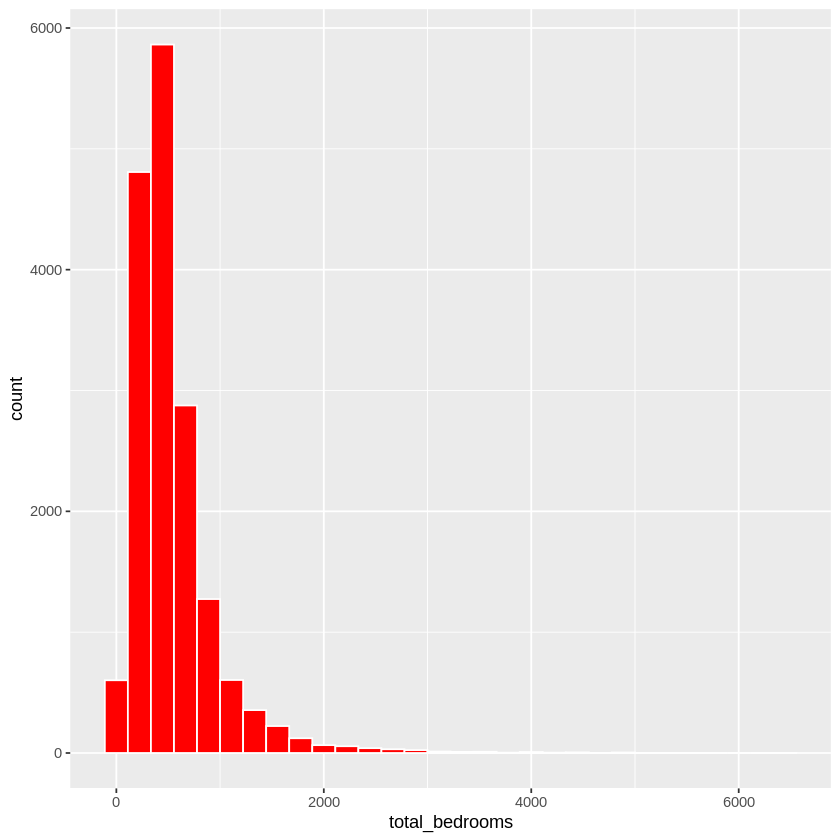

In [46]:
housing %>% ggplot() + geom_histogram(aes(x=total_bedrooms), color='white', fill='red', bins=30)

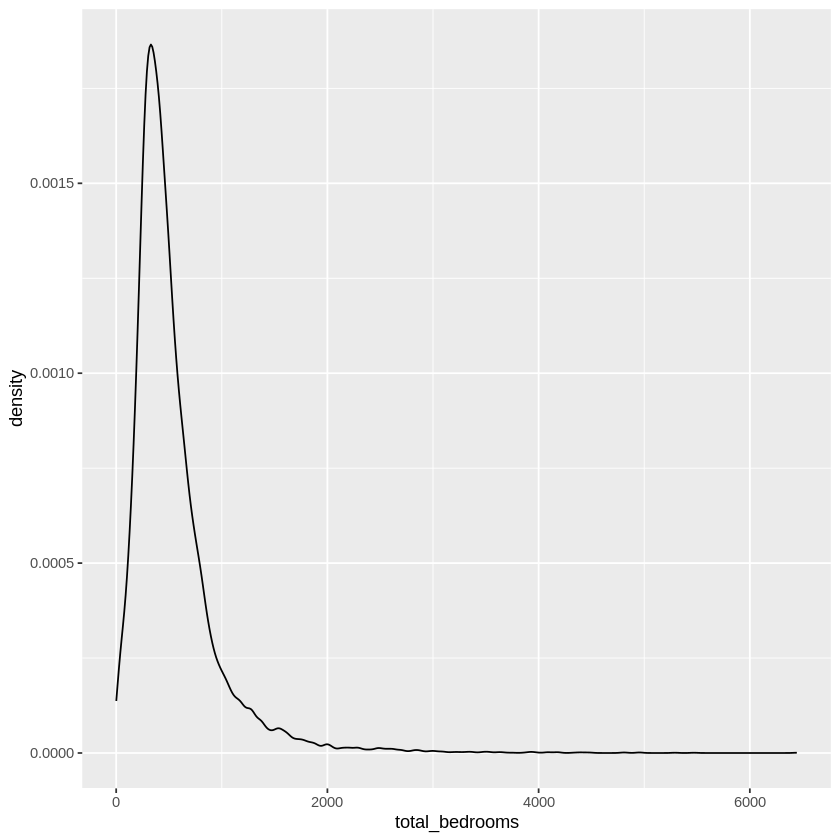

In [48]:
housing %>% ggplot() + geom_density(aes(x=total_bedrooms))

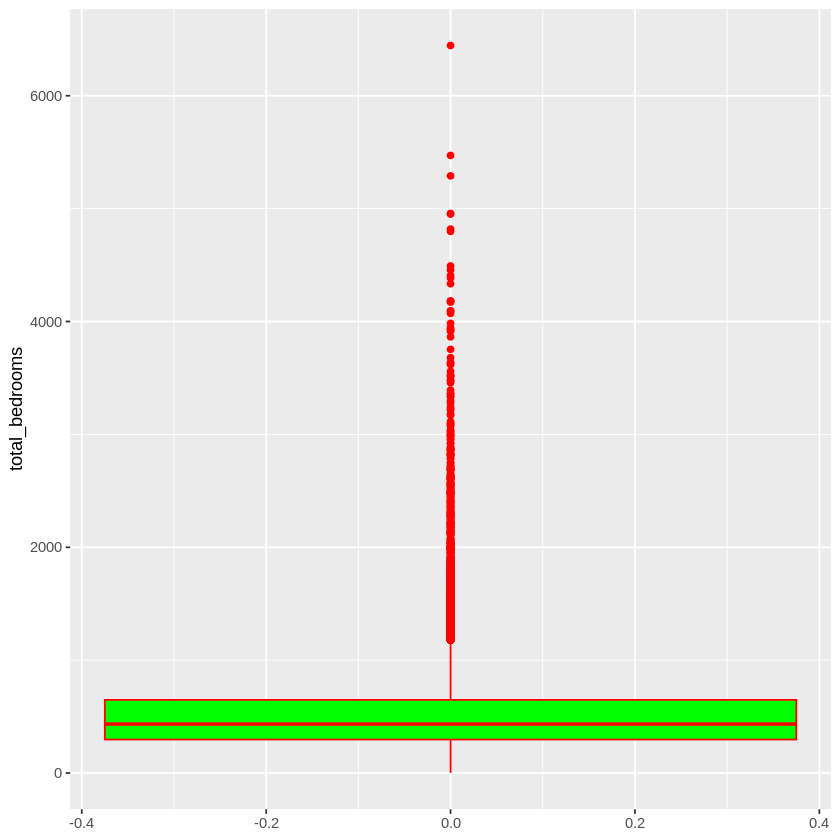

In [52]:
ggplot(housing) + geom_boxplot(aes(y=total_bedrooms), fill='green', color='red')

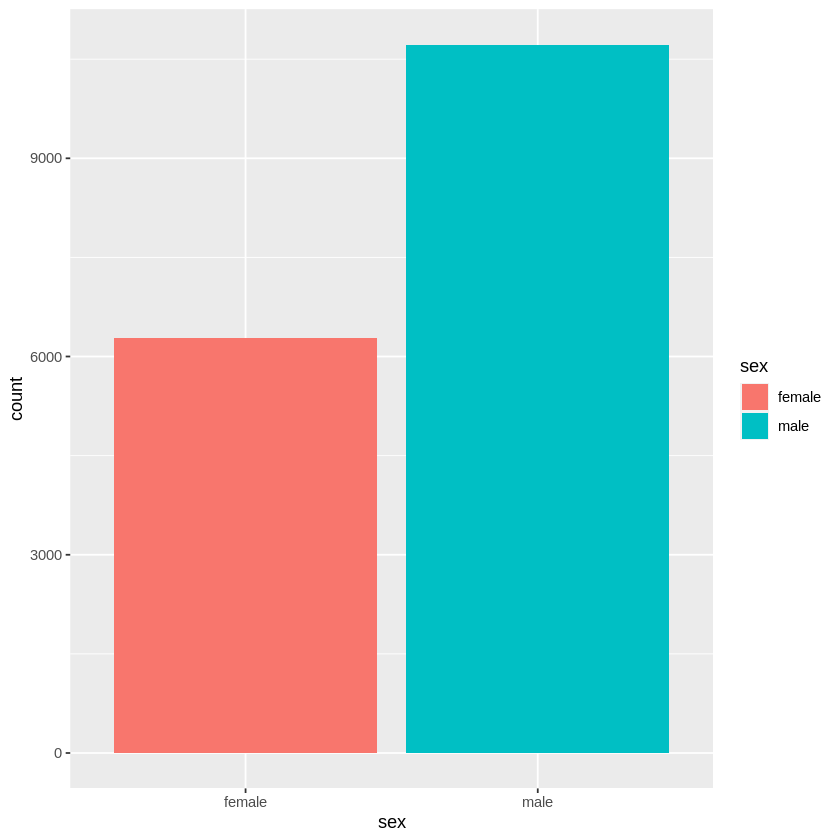

In [56]:
ggplot(housing) + geom_bar(aes(x=sex, fill=sex))

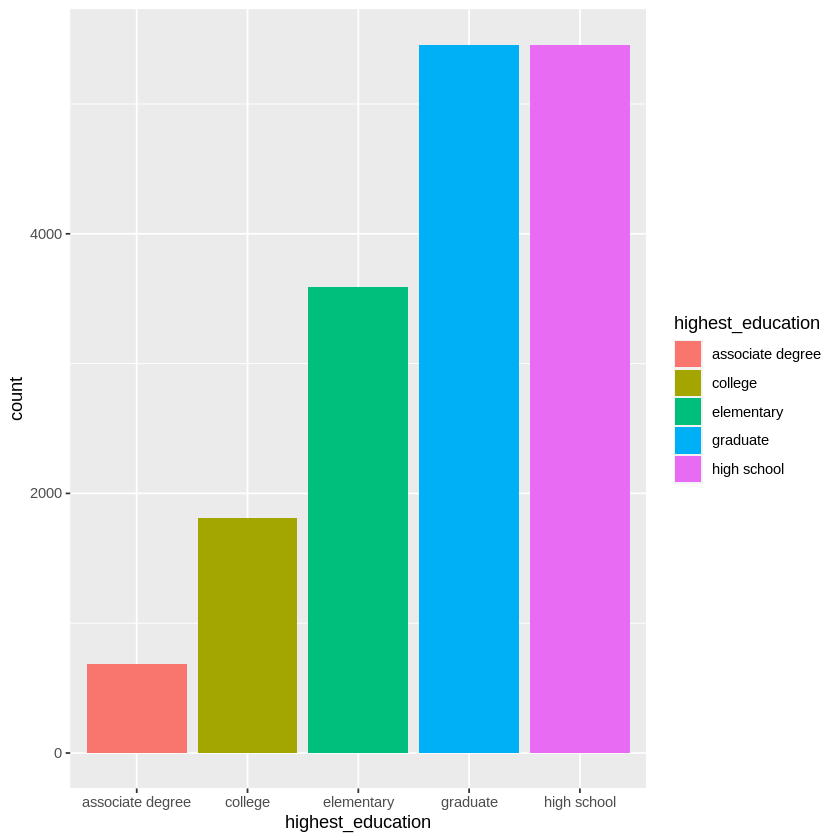

In [65]:
ggplot(housing) + geom_bar(aes(x=highest_education, fill=highest_education))

### Bivariate analysis

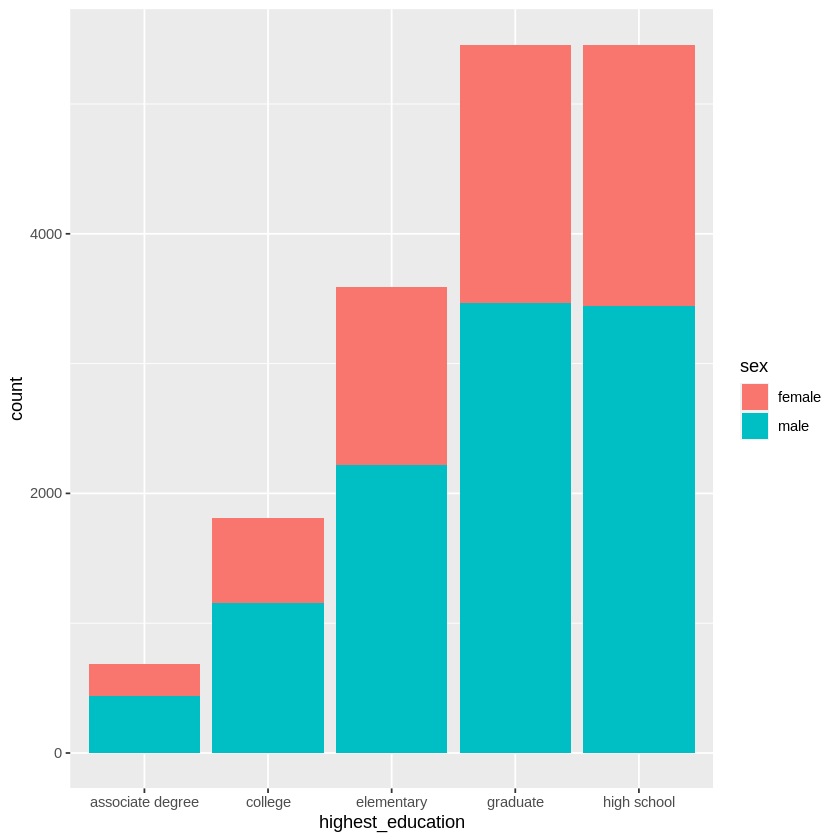

In [71]:
# categorical vs categorical
ggplot(housing) + geom_bar(aes(x=highest_education, fill=sex))

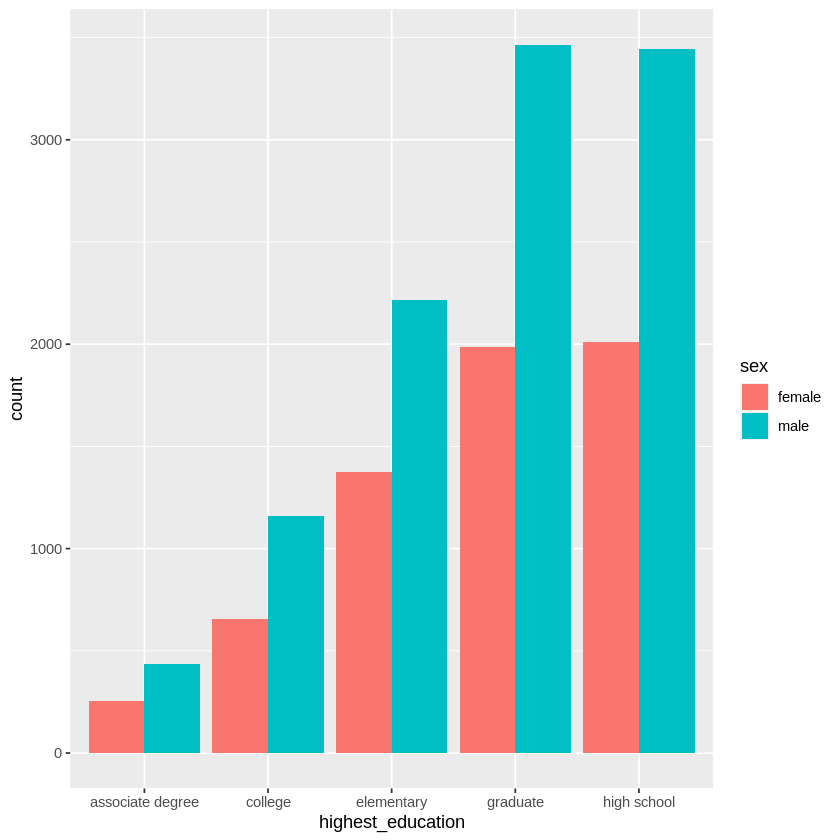

In [76]:
ggplot(housing) + geom_bar(aes(x=highest_education, fill=sex), position='dodge')

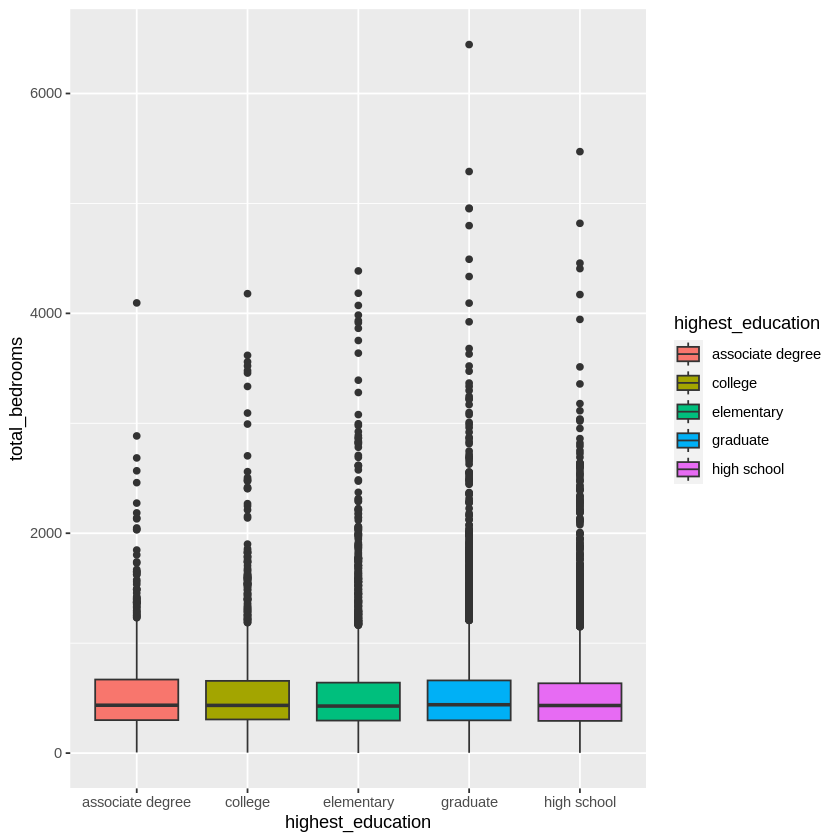

In [80]:
#numeric vs categorical
ggplot(housing) + geom_boxplot(aes(y=total_bedrooms, x=highest_education, fill=highest_education))

In [86]:
housing %>% names()

[1] "total_rooms"        "total_bedrooms"     "population"        
[4] "households"         "median_income"      "median_house_value"
[7] "sex"                "highest_education"

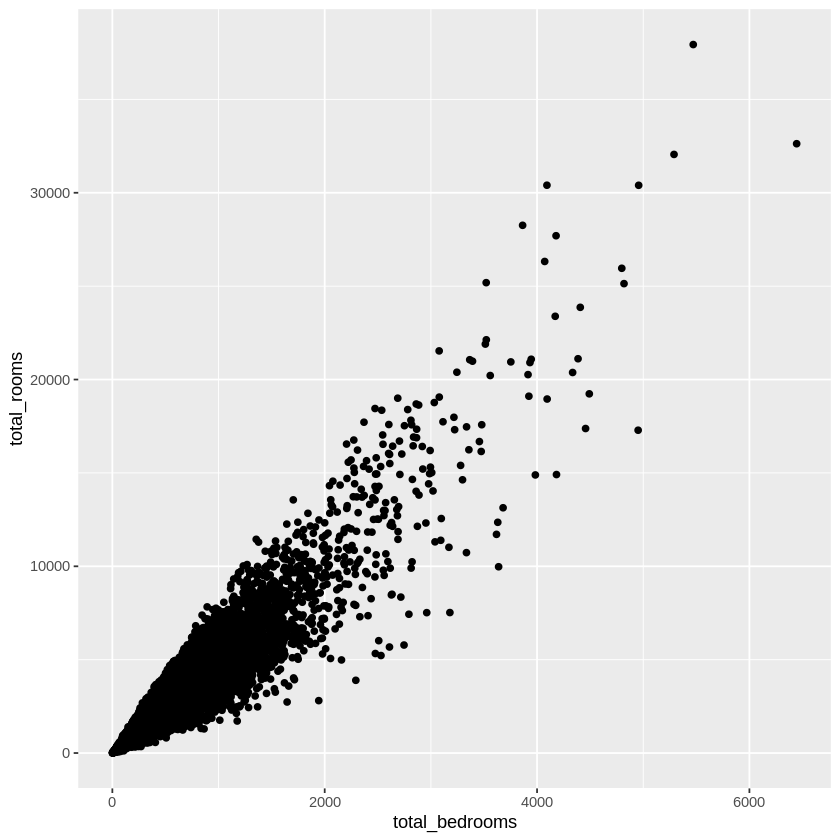

In [87]:
# numeric vs numeric
ggplot(housing) + geom_point(aes(x=total_bedrooms, y=total_rooms))

In [88]:
housing %>% with(cor(total_rooms, total_bedrooms))

[1] 0.928403

In [89]:
ls()

[1] "a"              "housing"        "schizophrenia"  "Titanic"       
[5] "USArrests"      "USstates"       "who"            "world_bank_pop"

In [99]:
world_bank_pop %>% 
  filter(indicator == 'SP.POP.GROW') %>% 
  filter(country %in% c('AUS', 'BRA', 'USA', 'IND', 'CHI')) -> wide_data

In [109]:
wide_data

country,indicator,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AUS,SP.POP.GROW,1.144473,1.2839681,1.1375387,1.1501927,1.0691981,1.2172907,1.3494508,1.8249968,2.0039114,2.0608332,1.5557063,1.3895273,1.7458200,1.7211514,1.4915665,1.4392167,1.5619405,1.6533905
BRA,SP.POP.GROW,1.366771,1.3206948,1.2628415,1.1856694,1.1393930,1.1172029,1.0773538,1.0320272,0.9872842,0.9531479,0.9394180,0.9285896,0.9003434,0.8683462,0.8578348,0.8459926,0.8112565,0.7922634
CHI,SP.POP.GROW,0.341242,0.5066083,0.7660050,0.7945681,0.8036864,0.8158526,0.8072764,0.8125598,0.8124842,0.8033674,0.7753018,0.5629844,0.5068902,0.7367777,0.6972146,0.7910856,0.9395272,0.9083896
IND,SP.POP.GROW,1.822184,1.8084464,1.7767679,1.7242690,1.6728109,1.6041292,1.5243080,1.4663718,1.4223915,1.3911949,1.3775958,1.3615881,1.3321920,1.2975488,1.2403622,1.1877953,1.1850462,1.1556245
USA,SP.POP.GROW,1.112769,0.9897414,0.9277975,0.8594817,0.9254840,0.9217132,0.9642539,0.9510552,0.9458653,0.8766513,0.8296167,0.7267867,0.7335999,0.6928603,0.7333615,0.7362173,0.7246761,0.6326440


In [118]:
t(wide_data) -> long_data

In [121]:
names(long_data) = c('Australia', 'Brazil', 'China', 'India', 'USA')

In [125]:
long_data %>% names()

[1] "Australia" "Brazil"    "China"     "India"     "USA"       NA         
  [7] NA          NA          NA          NA          NA          NA         
 [13] NA          NA          NA          NA          NA          NA         
 [19] NA          NA          NA          NA          NA          NA         
 [25] NA          NA          NA          NA          NA          NA         
 [31] NA          NA          NA          NA          NA          NA         
 [37] NA          NA          NA          NA          NA          NA         
 [43] NA          NA          NA          NA          NA          NA         
 [49] NA          NA          NA          NA          NA          NA         
 [55] NA          NA          NA          NA          NA          NA         
 [61] NA          NA          NA          NA          NA          NA         
 [67] NA          NA          NA          NA          NA          NA         
 [73] NA          NA          NA          NA          NA          NA         
 [79] NA          NA          NA          NA          NA          NA         
 [85] NA          NA          NA          NA          NA          NA         
 [91] NA          NA          NA          NA          NA          NA         
 [97] NA          NA          NA          NA

In [126]:
ls()

[1] "a"              "housing"        "long_data"      "schizophrenia" 
 [5] "Titanic"        "USArrests"      "USstates"       "who"           
 [9] "wide_data"      "world_bank_pop"

In [127]:
housing

total_rooms,total_bedrooms,population,households,median_income,median_house_value,sex,highest_education
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
5612,1283,1015,472,1.4936,66900,male,high school
7650,1901,1129,463,1.8200,80100,male,graduate
720,174,333,117,1.6509,85700,male,high school
1501,337,515,226,3.1917,73400,male,graduate
1454,326,624,262,1.9250,65500,male,high school
1387,236,671,239,3.3438,74000,male,elementary
2907,680,1841,633,2.6768,82400,male,elementary
812,168,375,158,1.7083,48500,male,graduate
4789,1175,3134,1056,2.1782,58400,male,college


In [132]:
?pivot_longer

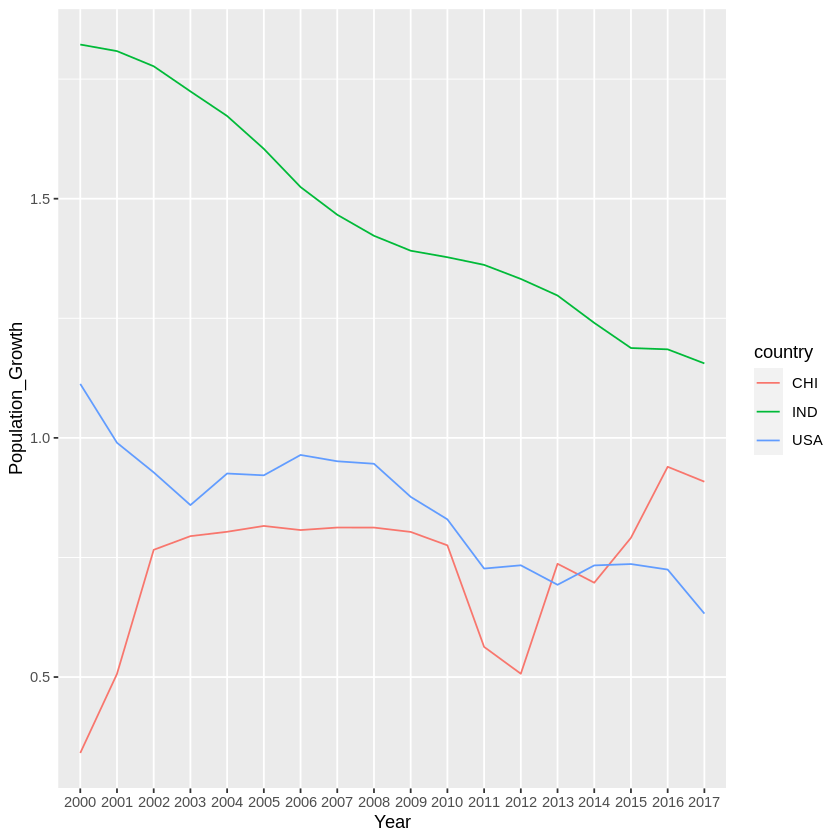

In [156]:
world_bank_pop %>% 
  filter(indicator == 'SP.POP.GROW' & country %in% c('IND', 'CHI', 'USA')) %>%
  pivot_longer(cols=c(`2000`, `2001`, `2002`, `2003`, `2004`, `2005`, `2006`, `2007`, `2008`, `2009`, `2010`, `2011`, `2012`, `2013`, `2014`, `2015`, `2016`, `2017`), names_to='Year', values_to = 'Population_Growth') %>% 
  select(-indicator) %>% 
  ggplot() + geom_line(aes(x=Year, y=Population_Growth, group=country, color=country))
  